In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

from tabulate import tabulate

In [3]:
df = pd.read_csv("Datasets/babyboom.csv")
df.columns = ["TimeOfBirth", "Sex", "WeightInGrams", "MinutesAfterMidnight"]

conditions = [
    df["Sex"] == 1,
    df["Sex"] == 2,
    pd.Series([True] * len(df)),
]
labels = ["all babies", "males", "females"]

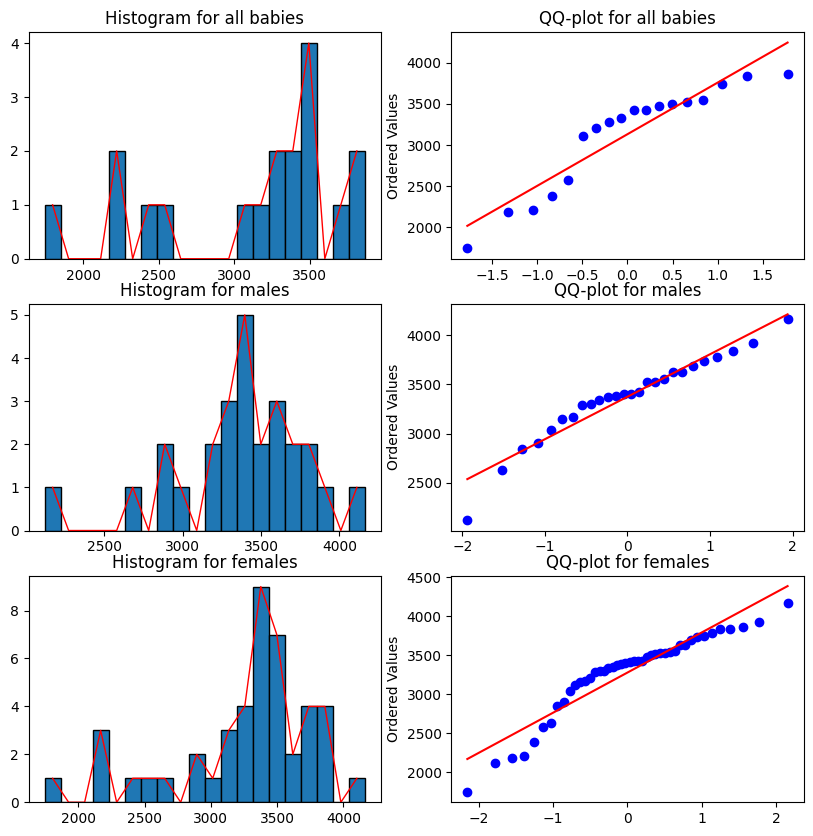

In [4]:
# Graphical verification of assumptions about normality
# For that purpose histograms and qq-plots are built

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

for i in range(3):
    data = df[conditions[i]]["WeightInGrams"]
    # histogram with frequency polygon    
    n, bins, patches = axes[i, 0].hist(data, bins=20, edgecolor="black")
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    axes[i, 0].plot(bin_centers, n, linestyle="-", color="red", linewidth=1)
    axes[i, 0].set_title(f"Histogram for {labels[i]}")
    # qq-plot
    stats.probplot(data, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f"QQ-plot for {labels[i]}")
    axes[i, 1].set_xlabel("")


In [5]:
# Confidence intervals for the parameters of the normal distribution
confidence = 0.95
alpha = 1 - confidence

table = []

for i in range(3):
    line = [labels[i]]

    data = df[conditions[i]]["WeightInGrams"]
    n = len(data)
    std = data.std()
    mean = data.mean()
    
    # confidence interval for mean (Student distribution)
    t = stats.t.ppf(1 - alpha/2, df=n-1)
    mean_ci = (
        round((mean - t * std / np.sqrt(n)).item(), 4), 
        round((mean + t * std / np.sqrt(n)).item(), 4),
    )
    line.append(mean_ci)

    # confidence interval for standard deviation (Hi-square deviation)
    hi2_lower = stats.chi2.ppf(alpha/2, df=n-1)
    hi2_upper = stats.chi2.ppf(1 - alpha/2, df=n-1)
    std_ci = (
        round(np.sqrt((n-1)*std**2/hi2_upper).item(), 4),
        round(np.sqrt((n-1)*std**2/hi2_lower).item(), 4),
    )
    line.append(std_ci)

    table.append(line)

print(tabulate(table, headers=["", "Mean", "Standard deviation"], tablefmt="fancy_grid"))


╒════════════╤════════════════════════╤══════════════════════╕
│            │ Mean                   │ Standard deviation   │
╞════════════╪════════════════════════╪══════════════════════╡
│ all babies │ (2818.3658, 3446.523)  │ (473.9317, 946.8332) │
├────────────┼────────────────────────┼──────────────────────┤
│ males      │ (3202.4162, 3548.1992) │ (335.6983, 590.8785) │
├────────────┼────────────────────────┼──────────────────────┤
│ females    │ (3115.418, 3436.4911)  │ (436.2725, 669.0306) │
╘════════════╧════════════════════════╧══════════════════════╛


In [6]:
# Testing hypotheses about the normal distribution
confidence = 0.95
alpha = 1 - confidence

table = []

for i in range(3):
    line = [labels[i]]

    data = df[conditions[i]]["WeightInGrams"]
    statistic, p_value = stats.shapiro(data)
    line.append(statistic)
    line.append(p_value)

    if p_value > alpha:
        line.append("Yes")
    else:
        line.append("No")
    
    table.append(line)

print(tabulate(table, headers=["", "Statistic", "P-value", "Is normally distributed"], tablefmt="fancy_grid"))

╒════════════╤═════════════╤═════════════╤═══════════════════════════╕
│            │   Statistic │     P-value │ Is normally distributed   │
╞════════════╪═════════════╪═════════════╪═══════════════════════════╡
│ all babies │    0.870283 │ 0.0179848   │ No                        │
├────────────┼─────────────┼─────────────┼───────────────────────────┤
│ males      │    0.947474 │ 0.202248    │ Yes                       │
├────────────┼─────────────┼─────────────┼───────────────────────────┤
│ females    │    0.898723 │ 0.000994397 │ No                        │
╘════════════╧═════════════╧═════════════╧═══════════════════════════╛


╒══════════════════════════════╤═════════════════════╕
│ Statistic                    │ 0.12461713801129565 │
├──────────────────────────────┼─────────────────────┤
│ P-value                      │ 0.47856775876549285 │
├──────────────────────────────┼─────────────────────┤
│ Is exponentially distributed │ Yes                 │
╘══════════════════════════════╧═════════════════════╛


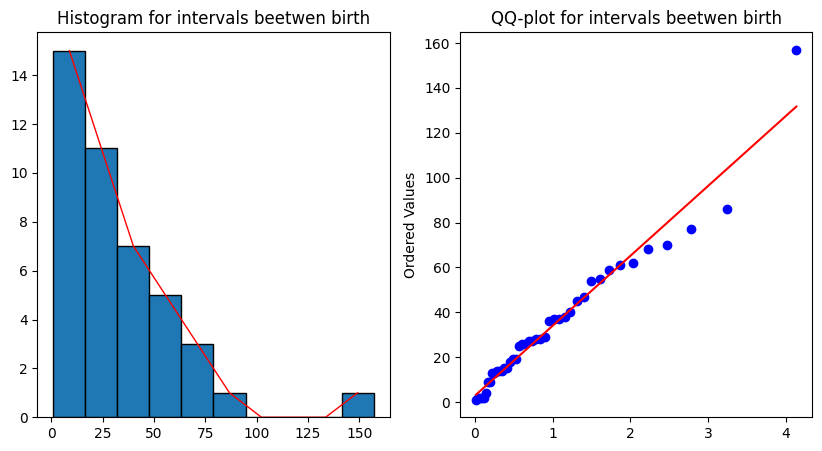

In [16]:
# Exponential distribution test for intervals between birth
data = df["MinutesAfterMidnight"].diff().dropna()
data = data[np.isfinite(data)]


# graphical verification of assumptions about exponential distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# histogram with frequency polygon    
n, bins, _ = axes[0].hist(data, bins=10, edgecolor="black")
bin_centers = 0.5 * (bins[1:] + bins[:-1])
axes[0].plot(bin_centers, n, linestyle="-", color="red", linewidth=1)
axes[0].set_title(f"Histogram for intervals beetwen birth")
# qq-plot
stats.probplot(data, dist="expon", plot=axes[1])
axes[1].set_title(f"QQ-plot for intervals beetwen birth")
axes[1].set_xlabel("")


# numerical verification
confidence = 0.95
alpha = 1 - confidence

loc, scale = stats.expon.fit(data)
statistic, p_value = stats.kstest(data, "expon", args=(loc, scale))

table = []
table.append(["Statistic", statistic])
table.append(["P-value", p_value])
table.append(["Is exponentially distributed", "Yes" if p_value > alpha else "No"])
print(tabulate(table, tablefmt="fancy_grid"))

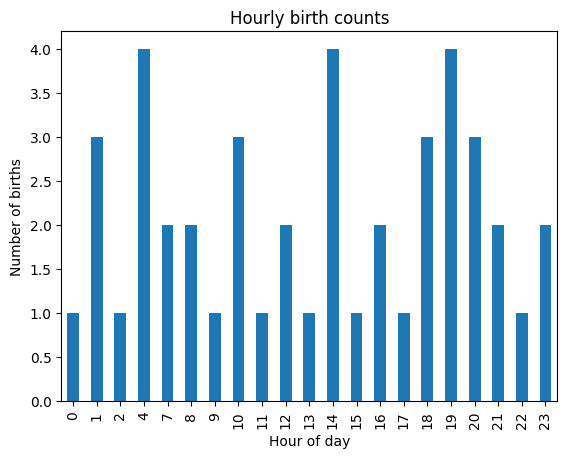

╒════════════════════════════════════════╤════════════════════╕
│ Statistic                              │ 3.9092527498131453 │
├────────────────────────────────────────┼────────────────────┤
│ P-value                                │ 0.4184264420071915 │
├────────────────────────────────────────┼────────────────────┤
│ Is it distributed according to Poisson │ Yes                │
╘════════════════════════════════════════╧════════════════════╛


In [25]:
# Puasson distribution test for number of births per hour

# graphic
df["hour"] = df["MinutesAfterMidnight"] // 60
hour_counts = df["hour"].value_counts().sort_index()

hour_counts.plot(kind="bar")
plt.xlabel("Hour of day")
plt.ylabel("Number of births")
plt.title("Hourly birth counts")
plt.show()

# numerical verification
lambda_hat = hour_counts.mean() # evaluation of the lambda parameter
observed_freqs = hour_counts.value_counts().sort_index()
max_births = observed_freqs.index.max()
observed = np.array([observed_freqs.get(k, 0) for k in range(max_births + 1)])
expected_probs = stats.poisson.pmf(np.arange(max_births + 1), mu=lambda_hat)
expected = expected_probs * observed.sum()
expected = expected / expected.sum() * observed.sum()

statistic, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

table = []
table.append(["Statistic", statistic])
table.append(["P-value", p_value])
table.append(["Is it distributed according to Poisson", "Yes" if p_value > alpha else "No"])
print(tabulate(table, tablefmt="fancy_grid"))